In [1]:
file_path = '/Users/tanmaysagarhuria/Downloads/combined_df 3.csv'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Reading the CSV file into a DataFrame
combined_df = pd.read_csv(file_path)

In [6]:
# Assuming your DataFrame is named combined_df
# Dropping the 'Time' column from the DataFrame
combined_df = combined_df.drop('Time', axis=1)

# Now 'Time' column is removed, and you can use 'adjusted_time' for your calculations.


In [7]:
# Assuming your DataFrame is named combined_df
# Extract the date from the source_file column
combined_df['date'] = combined_df['source_file'].str.extract(r'(\d{4}-\d{2}-\d{2})')
combined_df['date'] = pd.to_datetime(combined_df['date'])

# Now you have a new column 'date' with datetime objects that can be used for analysis.


In [8]:
# Assuming your DataFrame is named combined_df
combined_df.drop('source_file', axis=1, inplace=True)


In [9]:
# Assuming your DataFrame is named combined_df and has a 'date' column
# Extracting day number from the 'date' column
combined_df['day_number'] = combined_df['date'].dt.dayofyear

# Now your DataFrame has a 'day_number' column representing the day of the year for each date


In [10]:
# Assuming your DataFrame is named combined_df and has a 'date' column
# Extracting month number from the 'date' column
combined_df['month_number'] = combined_df['date'].dt.month

# Now your DataFrame has a 'month_number' column representing the month for each date


In [20]:
# Assuming your DataFrame is named combined_df
# Display the first few rows of the DataFrame
print(combined_df.head())


  Type  Price  Volume  day_number          adjusted_time       date  \
0  bid      1       6           2 0 days 00:00:00.279000 2025-01-02   
1  ask    798       1           2 0 days 00:00:01.643000 2025-01-02   
2  bid    261       1           2 0 days 00:00:01.736000 2025-01-02   
3  bid    261       1           2 0 days 00:00:01.984000 2025-01-02   
4  ask    797       1           2 0 days 00:00:01.984000 2025-01-02   

   month_number  adjusted_time_seconds  
0             1                  0.279  
1             1                  1.643  
2             1                  1.736  
3             1                  1.984  
4             1                  1.984  


In [13]:
# Assuming your DataFrame is named combined_df
combined_df.drop('new_day_start', axis=1, inplace=True)


In [19]:
# Assuming your DataFrame is named combined_df
# Convert 'adjusted_time' to timedelta
combined_df['adjusted_time'] = pd.to_timedelta(combined_df['adjusted_time'])

# Now convert 'adjusted_time' to seconds and store in a new column
combined_df['adjusted_time_seconds'] = combined_df['adjusted_time'].dt.total_seconds()


In [21]:
# Assuming your DataFrame is named combined_df
# Use pd.get_dummies to convert 'Type' into dummy/indicator variables
type_dummies = pd.get_dummies(combined_df['Type'], prefix='Type')

# Concatenate the new columns with the original DataFrame
combined_df = pd.concat([combined_df, type_dummies], axis=1)

# Now drop the original 'Type' column as it's been one-hot encoded
combined_df.drop('Type', axis=1, inplace=True)


In [22]:
print(combined_df.head())

   Price  Volume  day_number          adjusted_time       date  month_number  \
0      1       6           2 0 days 00:00:00.279000 2025-01-02             1   
1    798       1           2 0 days 00:00:01.643000 2025-01-02             1   
2    261       1           2 0 days 00:00:01.736000 2025-01-02             1   
3    261       1           2 0 days 00:00:01.984000 2025-01-02             1   
4    797       1           2 0 days 00:00:01.984000 2025-01-02             1   

   adjusted_time_seconds  Type_ask  Type_bid  
0                  0.279     False      True  
1                  1.643      True     False  
2                  1.736     False      True  
3                  1.984     False      True  
4                  1.984      True     False  


In [23]:
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named combined_df
# Select columns to be scaled
features_to_scale = ['Price', 'Volume', 'adjusted_time_seconds']

# Initialize the standard scaler
scaler = StandardScaler()

# Scale the features and replace in the dataframe
combined_df[features_to_scale] = scaler.fit_transform(combined_df[features_to_scale])

# View the first few rows of the DataFrame to check the scaled data
print(combined_df.head())


      Price    Volume  day_number          adjusted_time       date  \
0 -2.523188  0.758467           2 0 days 00:00:00.279000 2025-01-02   
1  6.631371 -0.868996           2 0 days 00:00:01.643000 2025-01-02   
2  0.463243 -0.868996           2 0 days 00:00:01.736000 2025-01-02   
3  0.463243 -0.868996           2 0 days 00:00:01.984000 2025-01-02   
4  6.619885 -0.868996           2 0 days 00:00:01.984000 2025-01-02   

   month_number  adjusted_time_seconds  Type_ask  Type_bid  
0             1              -1.732015     False      True  
1             1              -1.732014      True     False  
2             1              -1.732014     False      True  
3             1              -1.732014     False      True  
4             1              -1.732014      True     False  


In [24]:
from sklearn.preprocessing import MinMaxScaler

# Assuming your DataFrame is named combined_df
# Select columns to be scaled
features_to_scale = ['Price', 'Volume', 'adjusted_time_seconds']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the features and replace in the dataframe
combined_df[features_to_scale] = scaler.fit_transform(combined_df[features_to_scale])

# View the first few rows of the DataFrame to check the scaled data
print(combined_df.head())


      Price    Volume  day_number          adjusted_time       date  \
0  0.000000  0.087719           2 0 days 00:00:00.279000 2025-01-02   
1  0.997497  0.000000           2 0 days 00:00:01.643000 2025-01-02   
2  0.325407  0.000000           2 0 days 00:00:01.736000 2025-01-02   
3  0.325407  0.000000           2 0 days 00:00:01.984000 2025-01-02   
4  0.996245  0.000000           2 0 days 00:00:01.984000 2025-01-02   

   month_number  adjusted_time_seconds  Type_ask  Type_bid  
0             1           0.000000e+00     False      True  
1             1           3.566013e-07      True     False  
2             1           3.809151e-07     False      True  
3             1           4.457517e-07     False      True  
4             1           4.457517e-07      True     False  


Price: Scaled so that the prices have a consistent range or distribution, which helps the model learn effectively.
Volume: Also scaled for the same reasons as price. Neural networks often perform better when the input features are on a similar scale.
adjusted_time_seconds: Time values have been scaled to a similar range as the other features.

In [25]:
import numpy as np

def create_sequences(data, seq_length):
    xs = []
    ys = []
    
    for i in range(len(data)-seq_length):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
        
    return np.array(xs), np.array(ys)

# Select features to be used in the sequence creation
# This should exclude one-hot encoded 'Type' columns if you want to predict 'Price'
# You would include them if they are relevant for predictions
features = ['Price', 'Volume', 'adjusted_time_seconds']

# Number of previous time steps to use for predicting the next time step
sequence_length = 5

# Create sequences
X, y = create_sequences(combined_df[features].values, sequence_length)

# Information about the sequences
print(f"Sequence shape: {X.shape}")
print(f"Target shape: {y.shape}")


Sequence shape: (15297451, 5, 3)
Target shape: (15297451, 3)


In [26]:
# Assuming you've already created X and y

# Define the split point, for example, 80% training and 20% testing
split_point = int(len(X) * 0.8)

# Split the data into training and test sets
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

# It's also a good idea to have a validation set to tune the hyperparameters
# For simplicity, we'll take the last part of the training set as the validation set
validation_split_point = int(len(X_train) * 0.9)
X_train, X_val = X_train[:validation_split_point], X_train[validation_split_point:]
y_train, y_val = y_train[:validation_split_point], y_train[validation_split_point:]

# Output the shape of the splits
print(f'Train set shape: {X_train.shape}')
print(f'Validation set shape: {X_val.shape}')
print(f'Test set shape: {X_test.shape}')


Train set shape: (11014164, 5, 3)
Validation set shape: (1223796, 5, 3)
Test set shape: (3059491, 5, 3)


In [27]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming you have already imported Sequential and LSTM

# Define the LSTM model architecture
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, activation='relu'))
model.add(Dense(y_train.shape[1]))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Model summary
model.summary()


/Users/tanmaysagarhuria/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5, 50)          │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,153 (121.69 KB)

 Trainable params: 31,153 (121.69 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the model with a simpler architecture
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(32, activation='relu'))
model.add(Dense(y_train.shape[1]))

# Compile the model with a potentially larger batch size
model.compile(optimizer='adam', loss='mse')

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001, mode='min', verbose=1)

# Fit the model with the new callbacks
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64, # Increase if your hardware can handle it
    validation_data=(X_val, y_val),
    verbose=1,
    shuffle=False,
    callbacks=[early_stopping, reduce_lr]
)



Epoch 1/50
172097/172097 ━━━━━━━━━━━━━━━━━━━━ 347s 2ms/step - loss: 9.5125e-04 - val_loss: 0.0024 - learning_rate: 0.0010
Epoch 2/50
172097/172097 ━━━━━━━━━━━━━━━━━━━━ 350s 2ms/step - loss: 0.0010 - val_loss: 0.0024 - learning_rate: 0.0010
Epoch 3/50
172097/172097 ━━━━━━━━━━━━━━━━━━━━ 351s 2ms/step - loss: 0.0010 - val_loss: 0.0024 - learning_rate: 0.0010
Epoch 4/50
172097/172097 ━━━━━━━━━━━━━━━━━━━━ 351s 2ms/step - loss: 0.0010 - val_loss: 0.0024 - learning_rate: 0.0010
Epoch 5/50
172097/172097 ━━━━━━━━━━━━━━━━━━━━ 354s 2ms/step - loss: 0.0010 - val_loss: 0.0024 - learning_rate: 0.0010
Epoch 6/50
172097/172097 ━━━━━━━━━━━━━━━━━━━━ 354s 2ms/step - loss: 0.0010 - val_loss: 0.0024 - learning_rate: 0.0010
Epoch 7/50
172097/172097 ━━━━━━━━━━━━━━━━━━━━ 356s 2ms/step - loss: 0.0010 - val_loss: 0.0024 - learning_rate: 0.0010
Epoch 8/50
172097/172097 ━━━━━━━━━━━━━━━━━━━━ 347s 2ms/step - loss: 0.0010 - val_loss: 0.0024 - learning_rate: 0.0010
Epoch 9/50
172097/172097 ━━━━━━━━━━━━━━━━━━━━ 359s 2

95610/95610 ━━━━━━━━━━━━━━━━━━━━ 49s 516us/step
Test MSE: 0.01397332192651868
Test RMSE: 0.11820880646770222


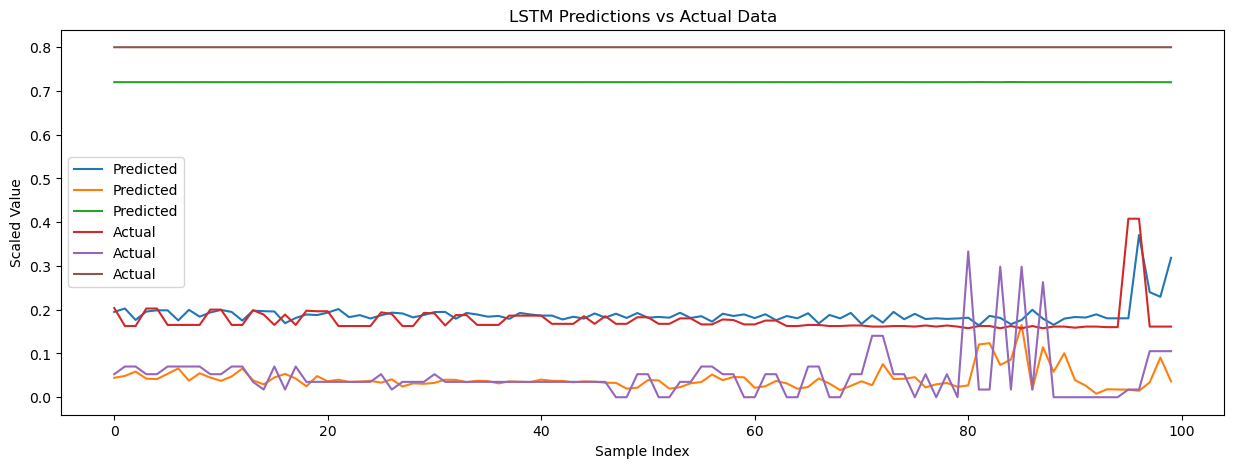

In [31]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Make predictions
predicted = model.predict(X_test)

# The output of the model is scaled, so you may need to inverse the scaling to compare it with the original data
# If you used a scaler and need to inverse the scaling, you would do it here
# predicted = scaler.inverse_transform(predicted)

# Calculate the mean squared error for the test set
mse = mean_squared_error(y_test, predicted)
print(f'Test MSE: {mse}')

# Calculate root mean squared error as well
rmse = np.sqrt(mse)
print(f'Test RMSE: {rmse}')

# Optionally, plot some predictions against the true values
plt.figure(figsize=(15, 5))
plt.plot(predicted[:100], label='Predicted')
plt.plot(y_test[:100], label='Actual')
plt.title('LSTM Predictions vs Actual Data')
plt.xlabel('Sample Index')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()


In [32]:
from sklearn.metrics import mean_absolute_error

# Assuming 'predicted' is your predicted values and 'y_test' are the actual values

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, predicted)
print(f'Test MAE: {mae}')

# You have already calculated MSE and RMSE previously
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)

# Print out all three metrics
print(f'Test MSE: {mse}')
print(f'Test RMSE: {rmse}')


Test MAE: 0.08437691872452406
Test MSE: 0.01397332192651868
Test RMSE: 0.11820880646770222


In [34]:
def simulate_trading(predictions, actuals, threshold=0.01):
    capital = 1000  # Starting capital, for example $1000
    num_shares = 0
    
    # Assume we buy if the predicted increase is above a threshold, sell if below negative threshold
    for predicted, actual in zip(predictions, actuals):
        if predicted > threshold:  # Predicted a significant increase
            if capital > 0:
                num_shares = capital / actual  # Buy as many shares as possible
                capital = 0  # Invest all capital
        elif predicted < -threshold:  # Predicted a significant decrease
            if num_shares > 0:
                capital = num_shares * actual  # Sell all shares
                num_shares = 0
    
    # Final capital: value of remaining shares + cash
    final_capital = num_shares * actuals[-1] + capital
    return final_capital - 1000  # Profit or loss

# Dummy prediction values for illustration; replace with your actual predictions
predicted = [0.02, -0.03, 0.05, -0.04, 0.03, 0.02]
# Dummy actual values for illustration; replace with your actual y_test values
y_test = [100, 105, 100, 95, 90, 100]

# Run the simulation
profitability = simulate_trading(predicted, y_test)
print(f"Profitability of the model: {profitability}")



Profitability of the model: 108.33333333333348
